# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the notebook will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [6]:
pd.set_option('display.max_columns', 360)


In [7]:
# your code here
df[df['_STATE'].isin([9,34,36])].head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [8]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [9]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [10]:
#changing 88 (None) to 0 to balance the average
df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 88.0, 0,  df['PHYSHLTH'])

#dropping the 77 / 99 DON'T KNOW / REFUSED
df = df[df['PHYSHLTH'] < 77.0]




## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [11]:
# descriptive statistics
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

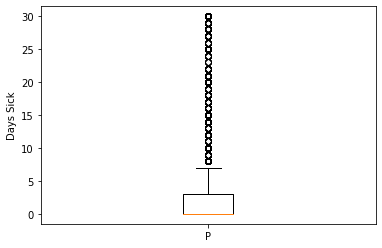

In [12]:
#Boxplot of Days Sick
fig, ax = plt.subplots()
ax.boxplot(df['PHYSHLTH'])
ax.set_ylabel('Days Sick')
ax.set_xticklabels('P')
plt.show()

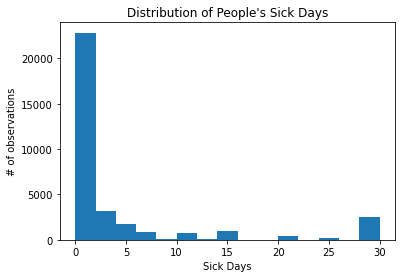

In [13]:
#Histogram of People's Sick Days
fig, ax = plt.subplots()
ax.hist(df['PHYSHLTH'], bins = 15)
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title('Distribution of People\'s Sick Days')
plt.show()


## 3. Generate a graphic that compares the average number of sick days for each state. 

In [14]:
# code to calculate the average number of sick days by state
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

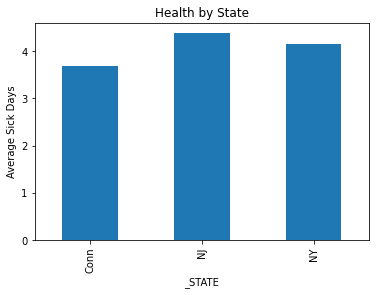

In [15]:
#Bargraph of Health by State
ax = df.groupby('_STATE')['PHYSHLTH'].mean().plot.bar()
ax.set_xticklabels(['Conn', 'NJ', 'NY'])
ax.set_ylabel('Average Sick Days')
ax.set_title('Health by State');

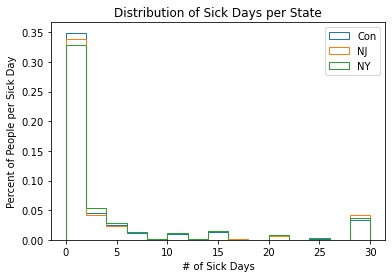

In [16]:
#Histogram of Days Sick by State
fig, ax = plt.subplots()

ax.hist(df[df['_STATE'] == 9.0]['PHYSHLTH'], label="Con", bins=15, density = True, histtype='step')
ax.hist(df[df['_STATE'] == 34.0]['PHYSHLTH'], label="NJ", bins=15, density = True, histtype='step')
ax.hist(df[df['_STATE'] == 36.0]['PHYSHLTH'], label="NY", bins=15, density = True, histtype='step')

ax.set_xlabel('# of Sick Days')
ax.set_ylabel('Percent of People per Sick Day')
ax.set_title('Distribution of Sick Days per State')
ax.legend()
plt.show()

#Shows normalized distribution of sick days per State

## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [17]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['PHYSHLTH']>7, 1, 0)

#If a person takes more than 7 sick days a month we are classifying them as chronically ill.

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [18]:
# code to calculate averages per state
df.groupby('_STATE')['chron'].mean()

_STATE
9.0     0.138385
34.0    0.165387
36.0    0.156197
Name: chron, dtype: float64

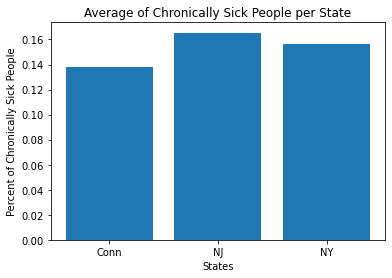

In [19]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()
ax.bar(list(range(3)), df.groupby('_STATE')['chron'].mean().values)
ax.set_xlabel('States')
ax.set_ylabel('Percent of Chronically Sick People')
ax.set_xticks(list(range(3)))
ax.set_xticklabels(['Conn', 'NJ', 'NY'])
ax.set_title('Average of Chronically Sick People per State')
plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [20]:
#cleaning the Smokers column
choices = ['Every day', 'Some days', 'Not at all', 'Don\'t Know', 'Refused']
conditions = [df['SMOKDAY2'] == 1.0, df['SMOKDAY2'] == 2.0, 
             (df['SMOKDAY2'] == 3.0) | (df['SMOKE100'] == 2.0),
             (df['SMOKDAY2'] == 7.0) | (df['SMOKE100'] == 7.0),
             (df['SMOKDAY2'] == 9.0) | (df['SMOKDAY2'] == 9.0)]

df['DOSMOKE'] = np.select(conditions, choices, default = None)

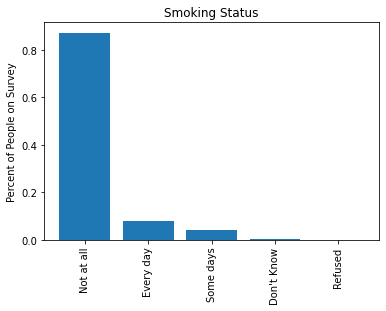

In [21]:
# code to graph those proportion of different smoking groups using matplotlib
fig, ax = plt.subplots()
ax.bar(df['DOSMOKE'].value_counts().index, df['DOSMOKE'].value_counts(normalize = True).values)
ax.set_ylabel ('Percent of People on Survey')
ax.set_xticks(list(df['DOSMOKE'].value_counts().index))
ax.set_xticklabels(list(df['DOSMOKE'].value_counts().index), rotation = 90)
ax.set_title('Smoking Status')
plt.show()
            

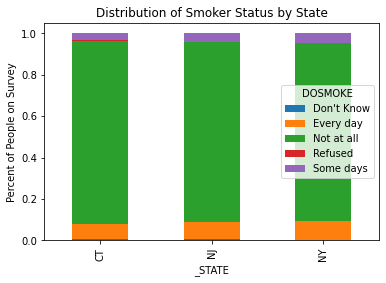

In [22]:
#Stacked bargraph of Smokers by State
fig, ax = plt.subplots()
df.groupby('_STATE')['DOSMOKE'].value_counts(normalize = True).unstack().plot(kind='bar', stacked = True, ax = ax)
ax.set_ylabel('Percent of People on Survey')
ax.set_title('Distribution of Smoker Status by State')
ax.set_xticklabels(['CT', 'NJ', 'NY']);

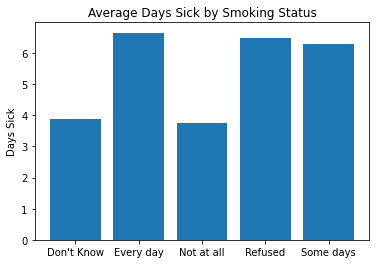

In [23]:
#Bargraph Average Days sick by Smoking Status
fig, ax = plt.subplots()
ax.bar(df.groupby('DOSMOKE')['PHYSHLTH'].mean().index, df.groupby('DOSMOKE')['PHYSHLTH'].mean().values)
ax.set_ylabel('Days Sick')
ax.set_title('Average Days Sick by Smoking Status')
plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [24]:
# code here to clean up the ALCDAY5 responses
other_values = {777:np.nan,
           888:0,
           999:np.nan}
df['DRINKALCOHOL'] = df['ALCDAY5'].replace(other_values)

In [25]:
df['DRINKALCOHOL'].value_counts()

0.0      12631
201.0     2968
202.0     2300
101.0     1565
203.0     1323
102.0     1217
230.0     1148
205.0     1147
204.0     1132
210.0      834
103.0      773
107.0      697
220.0      641
215.0      585
206.0      385
104.0      380
208.0      363
105.0      346
207.0      276
225.0      263
212.0      142
106.0      109
228.0       56
214.0       51
229.0       31
209.0       26
227.0       24
218.0       18
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: DRINKALCOHOL, dtype: int64

In [26]:
#function to modify the days in a range of 1-30
def to_days(x):
    if x > 200:
        return x-200
    elif x > 100:
        return x-100
    else:
        return x

In [27]:
df['DRINKALCOHOL'] = df['DRINKALCOHOL'].apply(lambda x: to_days(x))

In [28]:
df['DRINKALCOHOL'].value_counts().head()

0.0    12631
1.0     4533
2.0     3517
3.0     2096
4.0     1512
Name: DRINKALCOHOL, dtype: int64

In [29]:
#descriptive statistics of cleaned data
df['DRINKALCOHOL'].describe()

count    31532.000000
mean         3.902385
std          6.995242
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         30.000000
Name: DRINKALCOHOL, dtype: float64

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


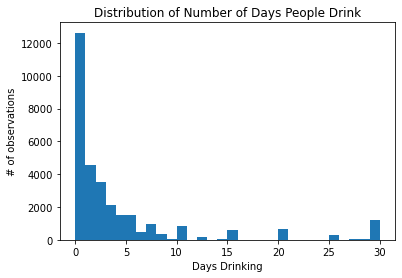

In [30]:
fig, ax = plt.subplots()
ax.hist(df['DRINKALCOHOL'], bins = 30)
ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title('Distribution of Number of Days People Drink')
plt.show()

In [31]:
df.groupby('_STATE')['DRINKALCOHOL'].mean()

_STATE
9.0     4.538690
34.0    3.569991
36.0    3.665085
Name: DRINKALCOHOL, dtype: float64

In [32]:
# Code to calculate the correlation statistic between the number of drinks and number of days physically ill
df[['DRINKALCOHOL', 'PHYSHLTH']].corr().loc['PHYSHLTH']

DRINKALCOHOL   -0.071209
PHYSHLTH        1.000000
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [33]:
len(df['PHYSHLTH'])

33747

In [34]:
from scipy import stats

In [35]:
df['PHYSHLTH'].count()

33747

In [36]:
mean = df['PHYSHLTH'].mean()
std = df['PHYSHLTH'].std()
z = stats.norm.ppf(.975)
n = df['PHYSHLTH'].count()

confidence_interval = (mean-(z*(std/(np.sqrt(n))), mean+(z*(std/(np.sqrt(n))))))
                                                                                      
print(f'We are 95% confident the population mean lies between {confidence_interval[0]} and {confidence_interval[1]}')

We are 95% confident the population mean lies between 3.9945111797832276 and -0.09082973940958983


-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [37]:
df['chron'].value_counts()

0    28556
1     5191
Name: chron, dtype: int64

In [38]:
p = df['chron'].sum()/df['chron'].count()
n = df['chron'].count()
print(p, n)

0.15382108039233117 33747


In [39]:
confidence_interval = (p-(z*np.sqrt(p*(1-p)/n)), p+(z*np.sqrt(p*(1-p)/n)))
print(f'We are 95% confident the average population proportion lies between {confidence_interval[0]} and {confidence_interval[1]}')

We are 95% confident the average population proportion lies between 0.14997188874372214 and 0.1576702720409402


___

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

## 9. Hypothesis Tests 

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. Based on the sample, assess whether or not the population mean is 4.
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


>NULL: The population mean is 4  
ALT: The population mean is not 4

In [40]:

x_bar = np.mean(df['PHYSHLTH'])
mu = 4
n = df['PHYSHLTH'].count()
se = np.std(df['PHYSHLTH']) / (np.sqrt(n))

z = (x_bar - mu)/se
p = stats.norm.sf(abs(z))*2
print(f'statistic: {z}, pvalue:{p}')

statistic: 1.8415510975809959, pvalue:0.06554083980355793


In [41]:
x_bar

4.085340919192817

>There is not enough evidence to reject the claim that the population mean is 4. This is supported by our p value being greater than our accepted alpha.

2____________

>NULL There is no difference between men and women in the number of days they feel ill.  
ALT There is a difference between men and women in the number of days they feel ill.


In [47]:
men = df[df['SEX']==1]['PHYSHLTH']
women = df[df['SEX'] == 2]['PHYSHLTH']

t = stats.ttest_ind(men, women, equal_var = False)
print(t)

Ttest_indResult(statistic=-7.384412969212337, pvalue=1.567871684086161e-13)


In [44]:
men.std()

8.230260880997584

In [45]:
women.std()

8.715033970549728

>We would reject the null hypothesis. This is supported by our p value being significantly less than our accepted alpha value.

3___________

>NULL There is no difference in physical health (days sick) from people in different states  
ALT There is a difference in physical health (days sick) from people in different states

In [42]:
CON = df[df['_STATE']==9]['PHYSHLTH']
NJ = df[df['_STATE'] ==34]['PHYSHLTH']
NY = df[df['_STATE'] == 36]['PHYSHLTH']


n = df['_STATE'].count()

f_critical = stats.f.ppf(q=1-.05, dfn=3-1, dfd=n-3)

f = stats.f_oneway(CON, NJ, NY)

print(f_critical)
print(f)

2.9959982450568097
F_onewayResult(statistic=18.558644605907094, pvalue=8.800607044147037e-09)


>We would reject the null hypothesis. This is supported by our p value being significantly less than our accepted alpha value.

### 9.B The following questions are regarding the  `CHRONIC` variable.
1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

1________

>NULL The population proportion is .10  
ALT The population proportion is NOT .10


In [48]:
p_hat = df['chron'].sum()/ df['chron'].count()

p_obs = .10

n = df['chron'].count()

z = (p_hat - p_obs) / np.sqrt(p_obs*(1-p_obs)/n)

crit = stats.norm.ppf(.975)


pval = stats.norm.sf(abs(z))*2

print(f'test-statistic:{z}, critical:{crit}, pvalue:{pval}, alpha:.05')

test-statistic:32.95708123480716, critical:1.959963984540054, pvalue:3.349242890255842e-238, alpha:.05


In [49]:
p_hat

0.15382108039233117

>We reject the null hypothesis. This is supported by our p value being significantly less than our accepted alpha value.

2______

In [44]:
#Changing the Refused answers in the Gender column to null
df['SEX'] = np.where(df['SEX'] == 9.0, None, df['SEX'])

>NULL: There is no difference between the percentage of men and women chronically sick.  
ALT: There is a difference between the percentage of men and woman chronically sick.

In [64]:
p1 = df[df['SEX']==1]['chron'].sum() / df[df['SEX']==1]['chron'].count()
p2 = df[df['SEX']==2]['chron'].sum() / df[df['SEX']==2]['chron'].count()

n1 = df[df['SEX']==1]['chron'].count()
n2 = df[df['SEX']==2]['chron'].count()

ptotal = (p1 + p2) / (n1 + n2)

z = p1 - p2 / np.sqrt(ptotal * (1-ptotal)* ((1/n1) + (1/n2)))

print(f'test-statistic:{z}')

test-statistic:-5066.58629191123


>We reject the null hypothesis because our z statistic is less than the critical value. There is statistical significance to reject the claim that there is no difference in percentage of men and women who are chronically sick.

3_______

>NULL The proportion of people with chronic health issues is equal across the states.  
ALT The proportion of people with chronic health issues is not equal across the states.

In [48]:
CON.value_counts()

0.0     6779
30.0     662
2.0      627
1.0      496
5.0      340
3.0      319
10.0     214
4.0      185
15.0     179
7.0      174
20.0     114
14.0      95
6.0       52
25.0      44
8.0       28
21.0      22
12.0      19
28.0      15
29.0      10
17.0       7
18.0       7
27.0       5
22.0       5
9.0        4
19.0       3
13.0       2
11.0       2
16.0       2
24.0       1
26.0       1
Name: PHYSHLTH, dtype: int64

In [49]:
CON = df[df['_STATE']==9]['chron']
NJ = df[df['_STATE'] ==34]['chron']
NY = df[df['_STATE'] == 36]['chron']

table = [[CON.count()-CON.sum(), CON.sum()], [NJ.count()-NJ.sum(), NJ.sum()], [NY.count()-NY.sum(), NY.sum()]]
stat, p, dof, exp = stats.chi2_contingency(table)

print(f'pvalue:{p}')

pvalue:1.5550739364327e-07


>We reject the null hypothesis because our pvalue is less than alpha. There is statistical significance to reject the claim that there is no difference in health issues across the states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

In [50]:
#dropping the null responses from the Drink Alcohol column
df.dropna(subset=['DRINKALCOHOL'], inplace = True)

1 & 2_____ Sample Mean & Sample STD / Confidence Interval

In [51]:
#Sample mean and Sample STD
sample_mean = df['DRINKALCOHOL'].mean()
sample_sd = df['DRINKALCOHOL'].std()
n = df['DRINKALCOHOL'].count()


#Confidence Interval
confidence = stats.t.interval(.05, df = n-1, loc = sample_mean, scale = sample_sd )
print(f'We are 95% confident the population mean lies between {confidence[0]} and {confidence[1]}')

We are 95% confident the population mean lies between 3.4637322763523137 and 4.341037481354143


3_____ Two Sample Test for Gender

>NULL: There is no difference between the percentage of men and women who drink alcohol.  
ALT: There is a difference between the percentage of men and woman who drink alcohol.

In [52]:
Male = df[df['SEX'] == 1]

Female = df[df['SEX'] ==2]

print(stats.ttest_ind(Male['DRINKALCOHOL'], Female['DRINKALCOHOL'], equal_var = False))

Ttest_indResult(statistic=21.746280280122097, pvalue=6.756349765591329e-104)


>We reject the null hypothesis because our t statistic is less than the critical value. There is statistical significance to reject the claim that there is no difference in percentage of men and women who drink alcohol.

4____ One Way ANOVA

>NULL: There is no difference between the mean number of drinkers per state.  
ALT: There is a difference between the mean number of drinkers in each state.

In [53]:
CON = df[df['_STATE'] == 9.0]['DRINKALCOHOL']
NJ = df[df['_STATE'] == 34.0]['DRINKALCOHOL']
NY = df[df['_STATE'] == 36.0]['DRINKALCOHOL']

print(stats.f_oneway(CON, NJ, NY))

F_onewayResult(statistic=59.06011835915735, pvalue=2.502899663622598e-26)


>We reject the null hypothesis because our test statistic is less than the critical value. There is statistical significance to reject the claim that there is no difference in mean number of drinkers per state.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.

In [54]:
#Healthcare Variable

#drop REFUSED from responses
df['_HCVU651']=np.where(df['_HCVU651'] == 9.0, None, df['_HCVU651'])

In [55]:
df['_HCVU651'].value_counts()

1.0    18518
2.0     1870
Name: _HCVU651, dtype: int64

1_______Confidence Interval

In [56]:
p = df['_HCVU651'].value_counts()[1]/df['_HCVU651'].value_counts().sum()
n = len(df['_HCVU651'])

confidence_interval = (p-(z*np.sqrt(p*(1-p)/n)), p+(z*np.sqrt(p*(1-p)/n)))
print(f'We are 95% confident the population proportion mean lies between {confidence_interval[0]} and {confidence_interval[1]}')

We are 95% confident the population proportion mean lies between 9.344557842510048 and -7.527999082455112


2______Z Test 2 Proportions

>NULL: There is no difference between the percentage of men and women who have healthcare.  
ALT: There is a difference between the percentage of men and woman who have healthcare.

In [57]:
healthcare = df[df['_HCVU651'] == 1]

Female = healthcare['SEX'].value_counts(normalize=True)[2]
Male = healthcare['SEX'].value_counts(normalize=True)[1]

x1 = Male
n1 = len(healthcare)

x2 = Female
n2 = len(healthcare)

p = (x1+x2)/(n1+n2)

z = (Male-Female)/(np.sqrt((p*(1-p)*((1/n1)+(1/n2)))))
print(f'teststat: {z}')

teststat: -2005.7852768705545


>We reject the null hypothesis because our z statistic is less than the critical value. There is statistical significance to reject the claim that there is no difference in percentage of men and women who have healthcare.

3_____CHI SQUARED

>NULL There is no difference in numbers of people who have healthcare across the states  
ALT There is a difference in numbers of people who have healthcare across the states

In [58]:
#Renaming the No values to 0.
df['_HCVU651'] = np.where(df['_HCVU651'] == 2.0, 0, df['_HCVU651'])
df['_HCVU651'].value_counts()

1.0    18518
0.0     1870
Name: _HCVU651, dtype: int64

In [59]:
CON = df[df['_STATE'] ==9.0]['_HCVU651']
NJ = df[df['_STATE'] ==34.0]['_HCVU651']
NY = df[df['_STATE'] ==34.0]['_HCVU651']

table = [[CON.count()-CON.sum(), CON.sum()], [NJ.count()-NJ.sum(), NJ.sum()], [NY.count()-NY.sum(), NY.sum()]]
stat, p, dof, exp = stats.chi2_contingency(table)

print(f'pvalue:{p}')

pvalue:4.1462790812511255e-14


>We reject the null hypothesis because our pvalue is less than alpha. There is statistical significance to reject the claim that there is no difference in numbers of people who have healthcare across the states.